# Random Walk on Networks

In [4]:
version$version.string
library('igraph')
library('Matrix')
library('pracma')

[1] "R version 3.5.1 (2018-07-02)"


Attaching package: 'igraph'

The following objects are masked from 'package:stats':

    decompose, spectrum

The following object is masked from 'package:base':

    union


Attaching package: 'pracma'

The following objects are masked from 'package:Matrix':

    expm, lu, tril, triu



In [1]:
create_transition_matrix = function (g){
    
    vs = V(g)
    n = vcount(g)
    adj = as_adjacency_matrix(g)
    adj[diag(rowSums(adj) == 0)] = 1  # handle if the user is using the function for networks with isolated nodes by creating self-edges
    z = matrix(rowSums(adj, , 1))
    
    transition_matrix = adj / repmat(z, 1, n)  # normalize to get probabilities
    
    return(transition_matrix)
}

In [2]:
network_probability = function (g, num_steps, start_node, teleportation = 0.0, pr = NULL, 
                                                   transition_matrix = NULL){
    if(is.null(transition_matrix))
        transition_matrix = create_transition_matrix(g)
        
    v = start_node
    for(i in 1:num_steps){
        PMF = transition_matrix[v, ]
        v = sample(vcount(g), 1, prob = PMF)
        
        # teleportation
        if (runif(1) < teleportation) {
            if (is.null(pr))
                v = sample(vcount(g), 1)
            else
                v = sample(vcount(g), 1, prob = pr)
        }
    }
    
    return(v)
}

# 3. PageRank
The PageRank algorithm, as used by the Google search engine, exploits the linkage structure of the web to compute global “importance” scores that can be used to inﬂuence the ranking of search results. Here, we use random walk to simulate PageRank.


In [5]:
set.seed(42)
g1 <- aging.prefatt.game(1000, m=4, pa.exp=1, aging.exp=-1, directed=T) #1000 nodes with m=4
g2 <- aging.prefatt.game(1000, m=4, pa.exp=1, aging.exp=-1, directed=T) #1000 nodes with m=4
g1_list=as_edgelist(g1)

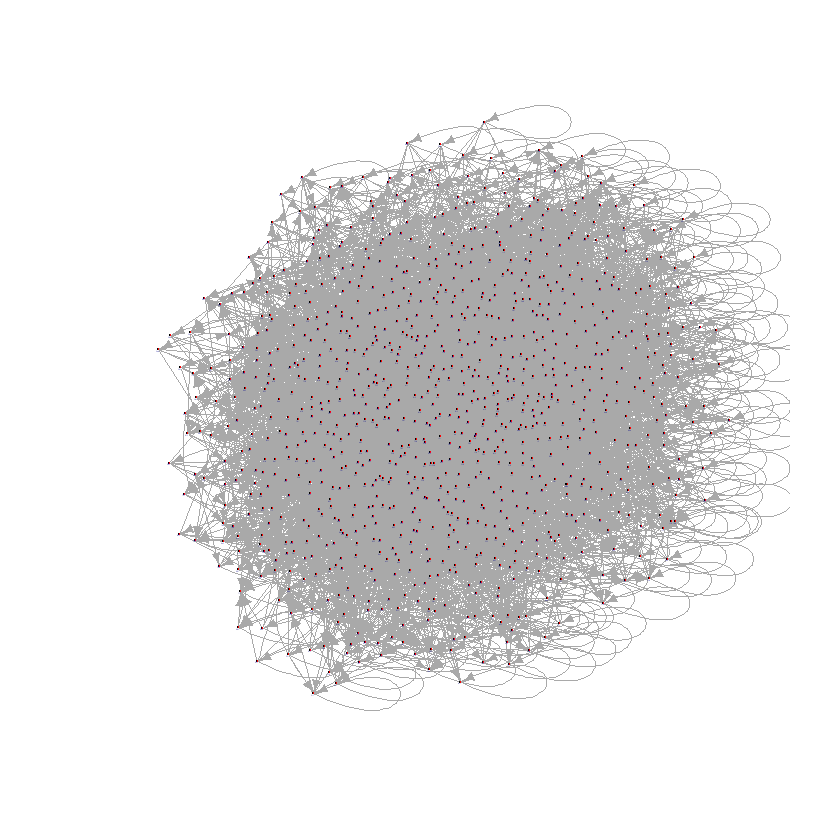

In [13]:
permutation=sample(vcount(g2))
g2_p = permute(g2,permutation) # get shuffeled g2
#g = g1+ edges(as_edgelist(g2_p))
g= add_edges(g1,as_edgelist(g2_p)) # combine edges for vertex from g2 to g1, and get the final network g
plot(g, vertex.size=0.5, vertex.color = "red",edge.arrow.size = .5,vertex.label.cex=0.001)

# 3.a)

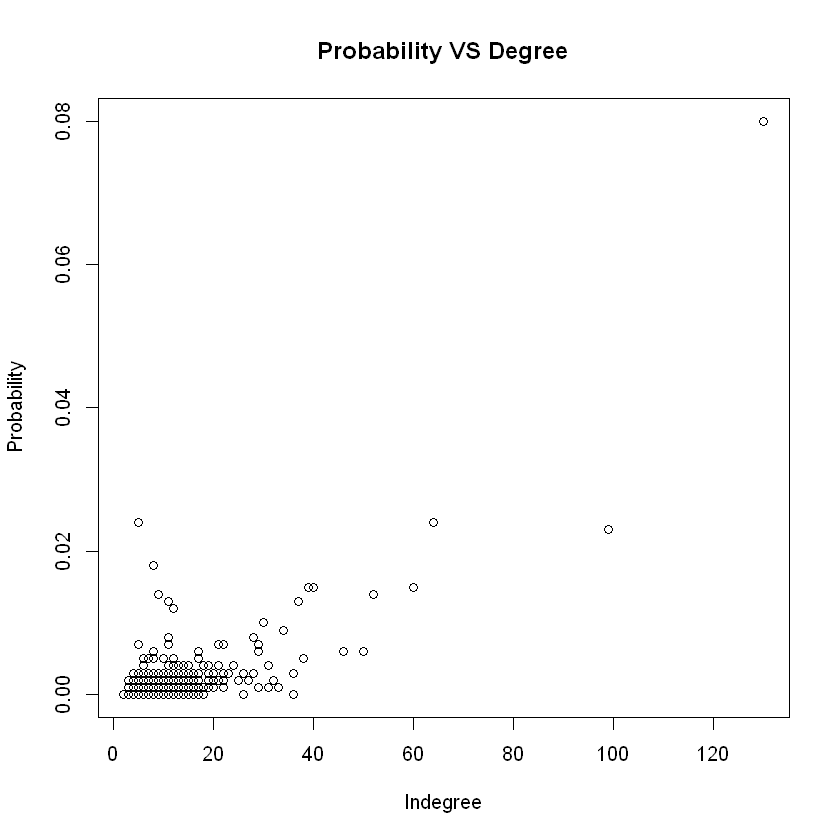

In [14]:
page_rank_1 = rep(0, 1000)
transition_matrix = create_transition_matrix(g)

for (start in 1:1000) {
    end = network_probability(g, 50, start, 0, NULL, transition_matrix)
    page_rank_1[end] = page_rank_1[end] + 1
}
page_rank_1 = page_rank_1 / 1000
# page_rank_old(p1, damping=0.999, niter=1000, eps=0.001)

plot(degree(g, mode = 'in'), page_rank_1, main = 'Probability VS Degree', xlab = 'Indegree', ylab = 'Probability')

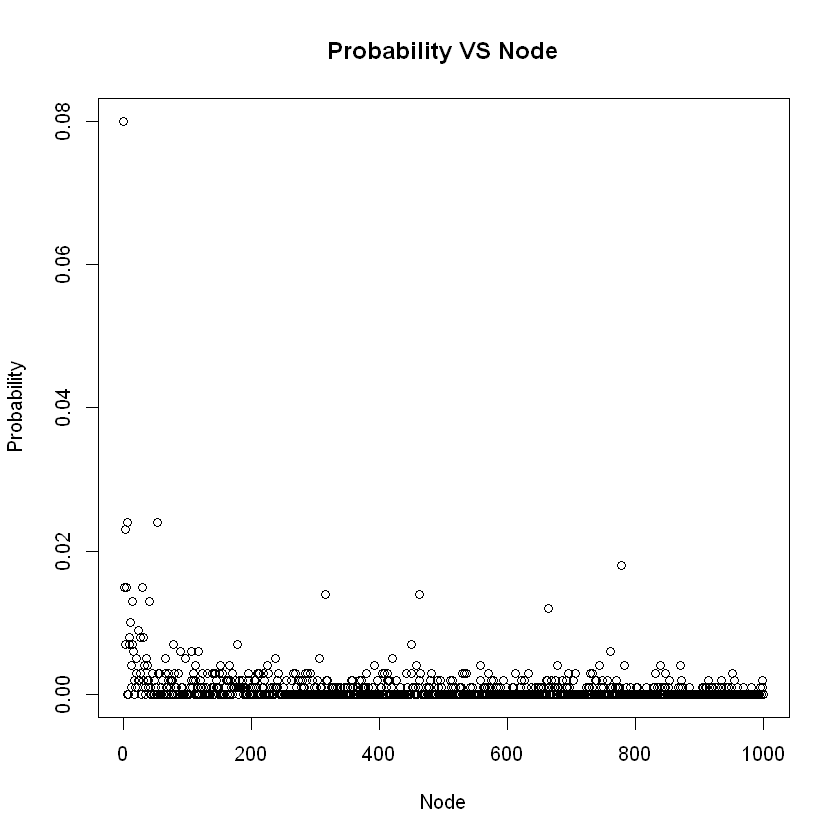

In [19]:
plot(page_rank_1, main = 'Probability VS Node', xlab = 'Node', ylab = 'Probability')

# 3.b)

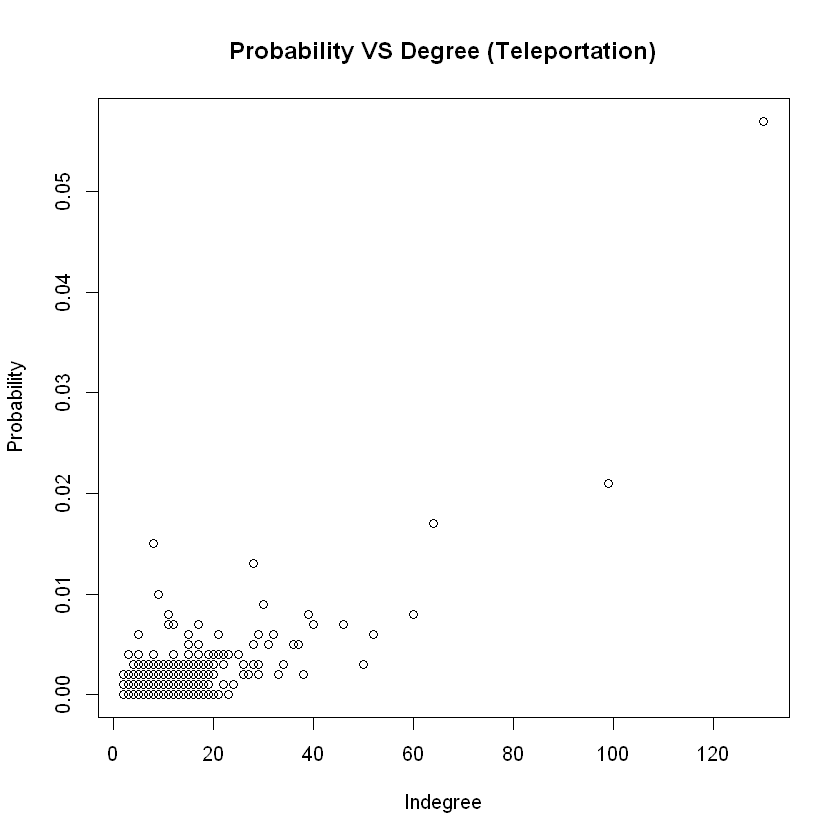

In [15]:

page_rank_2 = rep(0, 1000)

for (start in 1:1000) {
    end = network_probability(g, 50, start, 0.15, NULL, transition_matrix)
    page_rank_2[end] = page_rank_2[end] + 1
}
page_rank_2 = page_rank_2 / 1000

plot(degree(g, mode = 'in'),page_rank_2, 
     main = 'Probability VS Degree (Teleportation)', 
     xlab = 'Indegree', ylab = 'Probability')

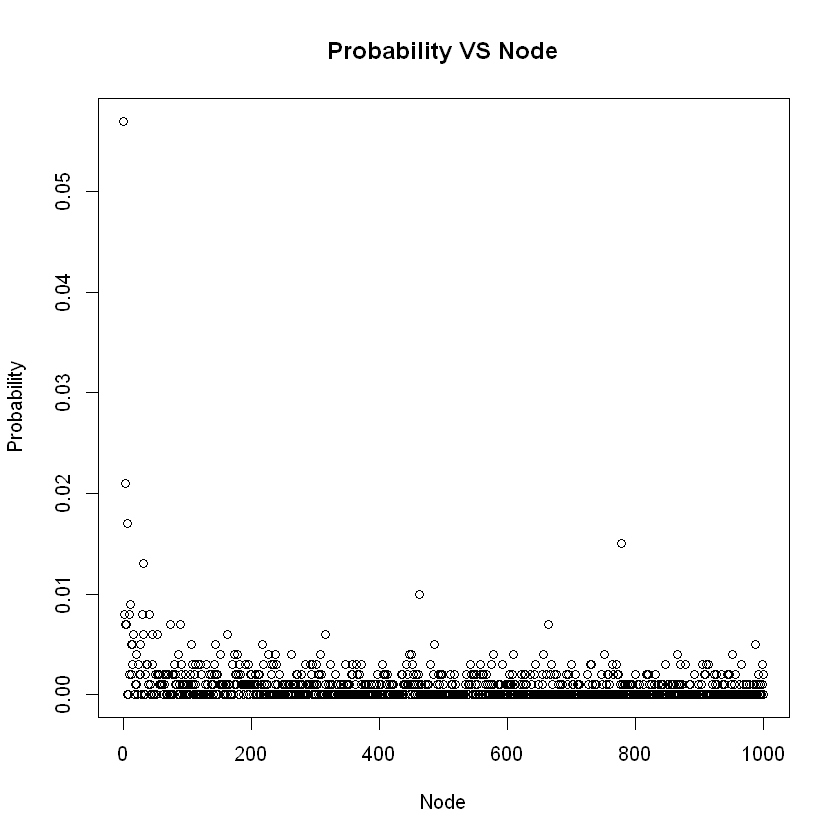

In [20]:
plot(page_rank_2, main = 'Probability VS Node', xlab = 'Node', ylab = 'Probability')

# 4. Personalized PageRank

# 4.a)

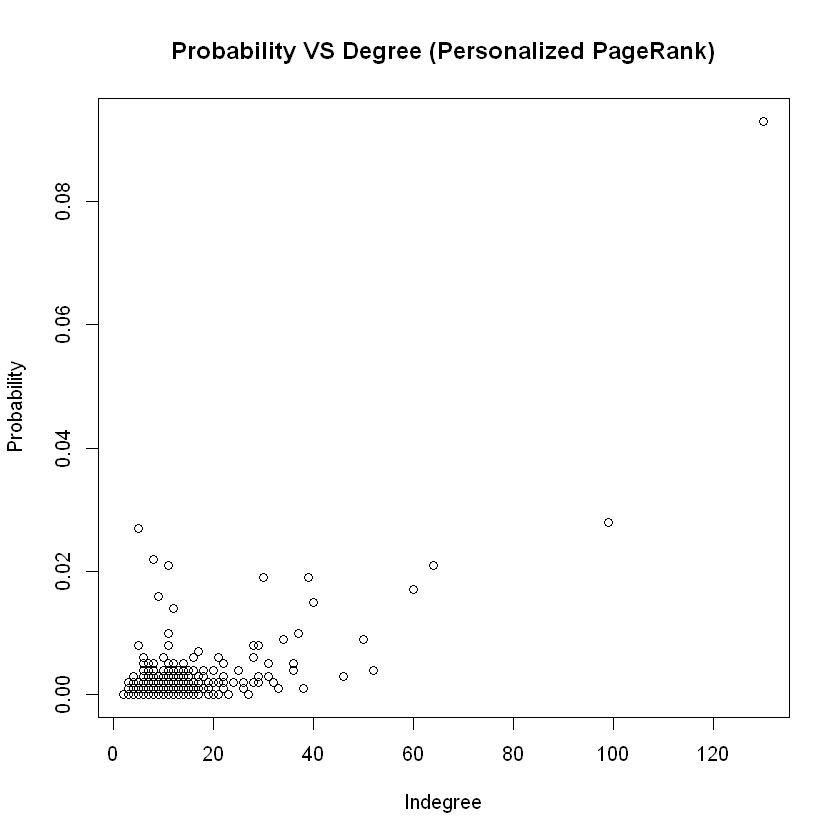

In [16]:
page_rank_3 = rep(0, 1000)

for (start in 1:1000) {
    end = network_probability(g, 50, start, 0.15, page_rank_1, transition_matrix)
    page_rank_3[end] = page_rank_3[end] + 1
}
page_rank_3 = page_rank_3 / 1000

plot(degree(g, mode = 'in'),page_rank_3, 
     main = 'Probability VS Degree (Personalized PageRank)', 
     xlab = 'Indegree', ylab = 'Probability')

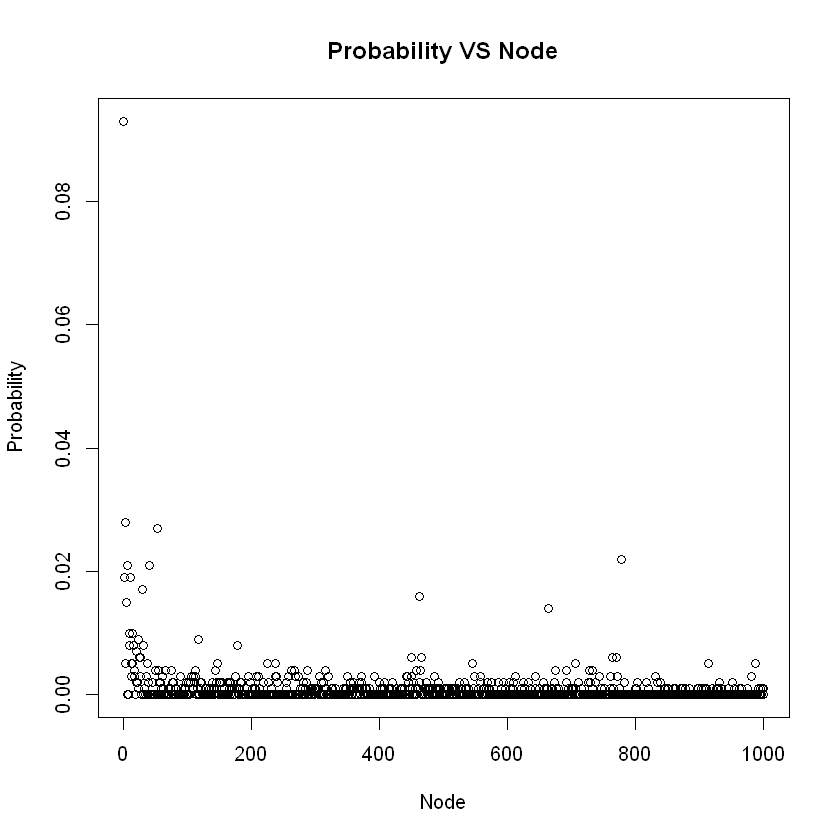

In [21]:
plot(page_rank_3, main = 'Probability VS Node', xlab = 'Node', ylab = 'Probability')

# 4.b)

In [17]:
n1 = order(page_rank_1)[500]
n2 = order(page_rank_1)[501]
degree(g, c(n1,n2), mode='in')

[1] 10  2

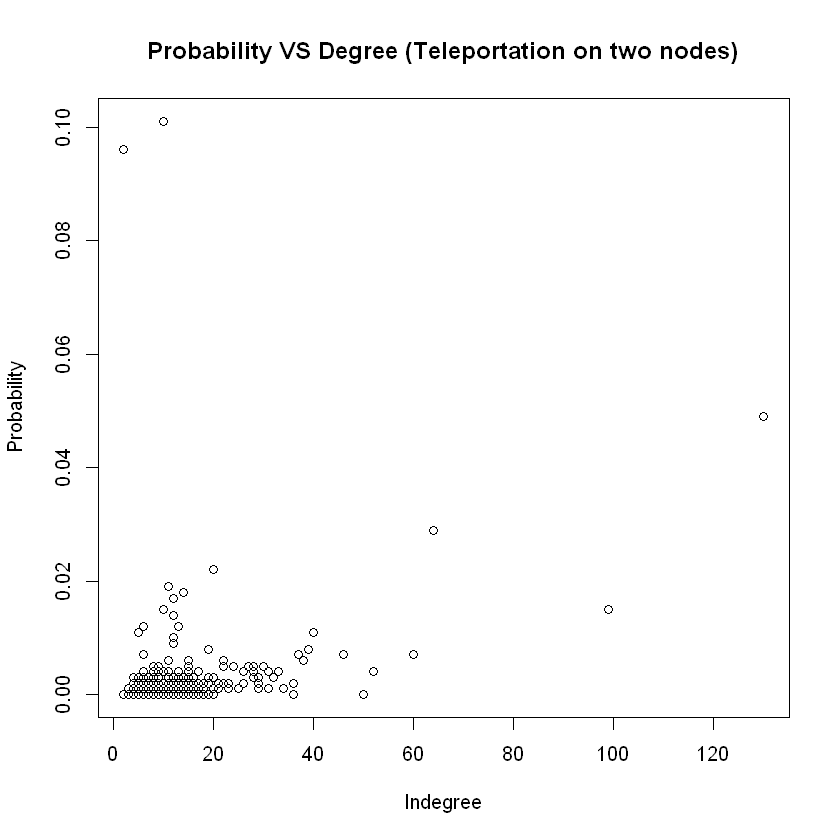

In [18]:

pr = rep(0, 1000)
pr[n1] = 0.5
pr[n2] = 0.5

page_rank_4 = rep(0, 1000)

for (start in 1:1000) {
    end = network_probability(g, 50, start, 0.15, pr, transition_matrix)
    page_rank_4 [end] = page_rank_4 [end] + 1
}
page_rank_4  =page_rank_4  / 1000

plot(degree(g, mode = 'in'), page_rank_4 , 
     main = 'Probability VS Degree (Teleportation on two nodes)', xlab = 'Indegree', ylab = 'Probability')

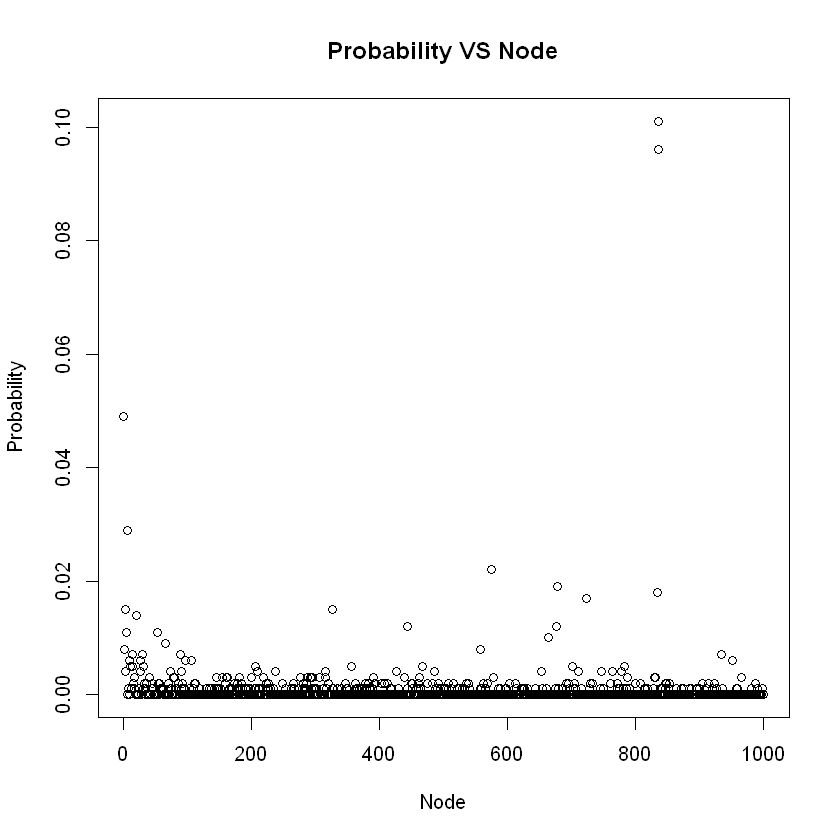

In [22]:
plot(page_rank_4, main = 'Probability VS Node', xlab = 'Node', ylab = 'Probability')

$P_{R(A)} = (1-d)P_{R^{'}(A)} + d \sum_{incomming nodes} \frac{P_{R(node)}}{L(node)}$

$P_{R^{'}(A)} = (1-d)/N + d \sum_{incomming nodes} \frac{P_{R(node)}}{L(node)}$